<a href="https://colab.research.google.com/github/GerasimovaAnastasia/sklearn_iris/blob/main/%D0%9B%D0%B0%D0%B1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛР1: Ирисы фишера
- даные можно скачать в гугл или в sklearn есть встроенный датасет с ирисами (sklearn.datasets.load_iris)
- Решить задачу кластеризации любым алгоритмом без учителя (например k-means), берем только признаки, Y (т.е названия цветков) не учитываем
- Решить задачу классификации либым алгоритом обучения с учителем, берем и X, и Y
- Сравнить результаты
В работе использовать sklearn

Populating the interactive namespace from numpy and matplotlib
## Названия признаков:
             Признак
0  sepal length (cm)
1   sepal width (cm)
2  petal length (cm)
3   petal width (cm)

## Первые 10 строк данных:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9 

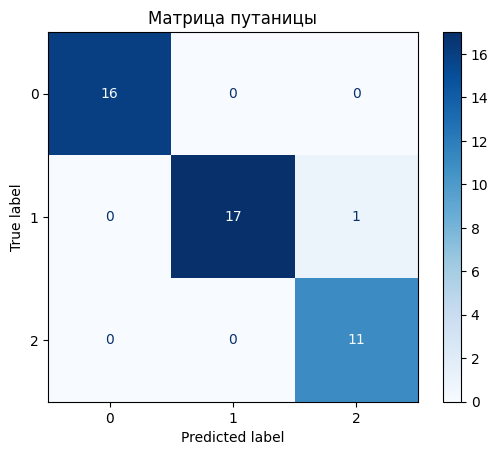

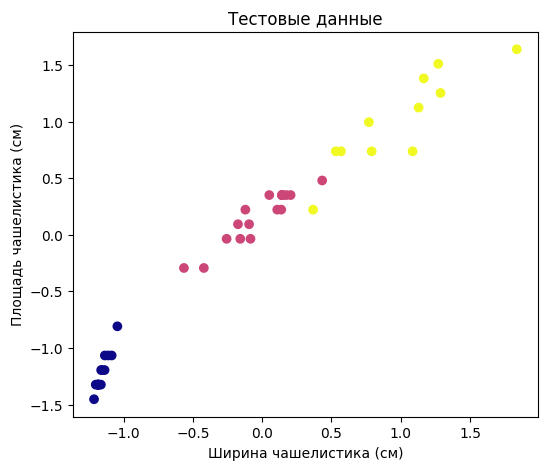

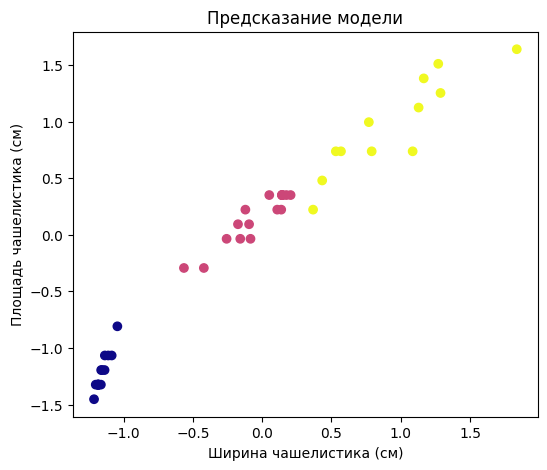

In [126]:
#Импортируем нужные библиотеки:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from pandas import DataFrame
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
%pylab inline
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()

# Вывод названий признаков
print("## Названия признаков:")
print(pd.DataFrame(iris.feature_names, columns=['Признак']))

# Вывод первых 10 строк данных
print("\n## Первые 10 строк данных:")
print(pd.DataFrame(iris.data[:10], columns=iris.feature_names))

# Вывод названий целевых классов
print("\n## Названия целевых классов:")
print(pd.DataFrame(iris.target_names, columns=['Класс']))

# Вывод значений целевой переменной
print("\n## Значения целевой переменной:")
print(pd.DataFrame(iris.target, columns=['Целевой класс']))
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной:
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами:
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

# Строим гистограммы по каждому признаку:
# pyplot.figure(figsize(20, 24))
# plot_number = 0
# for feature_name in iris['feature_names']:
#   for target_name in iris['target_names']:
#     plot_number += 1
#     pyplot.subplot(4, 3, plot_number)
#     pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
#     pyplot.title(target_name)
#     pyplot.xlabel('cm')
#     pyplot.ylabel(feature_name[:-4])
iris_frame['petal_area'] = 0.0
for k in range(0, 150):
  iris_frame.loc[k, 'petal_area'] = iris_frame.loc[k, 'petal length (cm)'] * iris_frame.loc[k, 'petal width (cm)']


#Таблица корреляции
# sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','petal_area','name']], hue = 'name')


# print(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','petal_area']].corr())

# corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','petal_area']].corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#   ax = sns.heatmap(corr, mask=mask, cbar=False, square=True, annot=True, cmap='coolwarm', vmin=-5, vmax=5)

train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['petal_area',
                                                                                'petal width (cm)']],
                                                                                     iris_frame['target'],
                                                                     test_size = 0.3, random_state = 0)
# Масштабируем данные
scaler = preprocessing.StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Создаем модель SVM
SVM_model = linear_model.SGDClassifier(alpha=0.0009, max_iter=1000, random_state = 0,  n_iter_no_change=10)
SVM_model.fit(train_data, train_labels)
SVM_model_predictions = SVM_model.predict(test_data)

# Вывод метрик качества
accuracy = metrics.accuracy_score(test_labels, SVM_model_predictions)
print(f"Точность: {accuracy:.2f}")  # Форматируем точность до двух знаков после запятой

report = classification_report(test_labels, SVM_model_predictions)
print(f"Отчет о классификации:\n{report}")

# Матрица путаницы
cm = metrics.confusion_matrix(test_labels, SVM_model_predictions, labels=SVM_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_model.classes_)
disp.plot(cmap='Blues', values_format='d')  # Используем цветовую палитру 'Blues'
plt.title('Матрица путаницы')
plt.show()


plt.figure(figsize=(6, 5))
plt.scatter(test_data[:, 0:1], test_data[:, -1:], c=test_labels.astype(float), cmap='plasma')
plt.title('Тестовые данные')
plt.xlabel('Ширина чашелистика (см)')
plt.ylabel('Площадь чашелистика (см)')
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(test_data[:, 0:1], test_data[:, -1:], c=SVM_model_predictions.astype(float), cmap='plasma')
plt.xlabel('Ширина чашелистика (см)')
plt.ylabel('Площадь чашелистика (см)')
plt.title('Предсказание модели')
plt.show()



Populating the interactive namespace from numpy and matplotlib
## Названия признаков:
             Признак
0  sepal length (cm)
1   sepal width (cm)
2  petal length (cm)
3   petal width (cm)

## Первые 10 строк данных:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9 

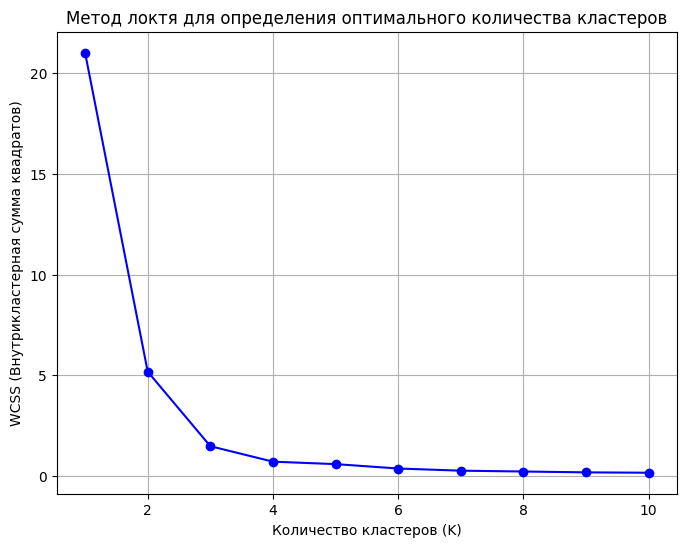

Optimal number of clusters: 3
Adjusted Rand Index: 0.9365593760298803
Silhouette Score: 0.7138534606030602
Calinski-Harabasz Index: 283.8370199660021
Davies-Bouldin Index: 0.42794111397851964


<ipython-input-125-a6f0f554aba5>:131: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(test_data[predictions == i, 0], test_data[predictions == i, 1],


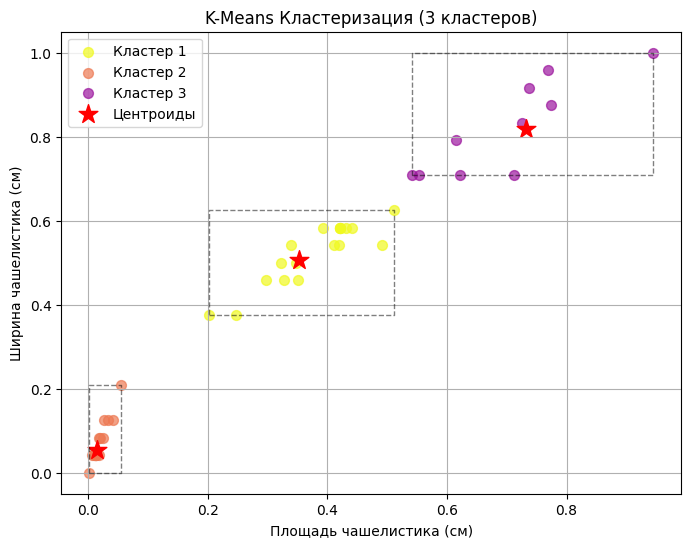

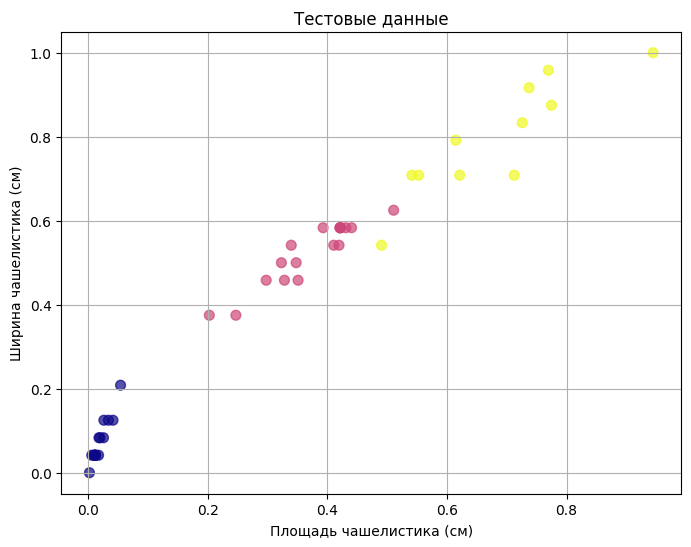

In [125]:
#Импортируем нужные библиотеки:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from pandas import DataFrame
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler # Импортируем MinMaxScaler
%pylab inline
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()

# Вывод названий признаков
print("## Названия признаков:")
print(pd.DataFrame(iris.feature_names, columns=['Признак']))

# Вывод первых 10 строк данных
print("\n## Первые 10 строк данных:")
print(pd.DataFrame(iris.data[:10], columns=iris.feature_names))

# Вывод названий целевых классов
print("\n## Названия целевых классов:")
print(pd.DataFrame(iris.target_names, columns=['Класс']))

# Вывод значений целевой переменной
print("\n## Значения целевой переменной:")
print(pd.DataFrame(iris.target, columns=['Целевой класс']))
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной:
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами:
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
print(iris_frame)


iris_frame['petal_area'] = 0.0
for k in range(0, 150):
  iris_frame.loc[k, 'petal_area'] = iris_frame.loc[k, 'petal length (cm)'] * iris_frame.loc[k, 'petal width (cm)']

# Разделяем данные на тренировочный и тестовый набор
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['petal_area','petal width (cm)']],
    iris_frame['target'],
    test_size = 0.3,
    random_state=0)

# Создаем модель K-Means
model = KMeans(n_clusters=3, random_state = 0)
model.fit(train_data)
model_predictions = model.predict(test_data)

# 1. Adjusted Rand Index (ARI): измеряет сходство между кластеризацией и истинными метками
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(test_labels, model_predictions)}")
# 2. Silhouette Score: измеряет качество кластеризации для каждой точки данных
silhouette_avg = metrics.silhouette_score(test_data, model_predictions)
print(f"Silhouette Score: {silhouette_avg}")

# Вычисляем Calinski-Harabasz Index
# 3. Измеряет отношение между дисперсией между кластерами и дисперсией внутри кластеров.
calinski_harabasz_score = metrics.calinski_harabasz_score(test_data, model_predictions)
print(f"Calinski-Harabasz Index: {calinski_harabasz_score}")

# Вычисляем Davies-Bouldin Index
# 4. Измеряет отношение между внутрикластерным расстоянием и межкластерным расстоянием.
davies_bouldin_score = metrics.davies_bouldin_score(test_data, model_predictions)
print(f"Davies-Bouldin Index: {davies_bouldin_score}")


# Масштабируем данные с помощью MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(train_data)
    wcss.append(kmeans.inertia_)

# # Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('WCSS (Внутрикластерная сумма квадратов)')
plt.grid(True)
plt.show()

# Нахождение "локтя"
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow
print(f"Optimal number of clusters: {optimal_k}")

# Обучаем модель с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0, max_iter=1000)
kmeans.fit(train_data)

# Делаем предсказания для тестовых данных
predictions = kmeans.predict(test_data)

# Выводим метрики качества
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(test_labels, predictions)}")

silhouette_avg = metrics.silhouette_score(test_data, predictions)
print(f"Silhouette Score: {silhouette_avg}")

calinski_harabasz_score = metrics.calinski_harabasz_score(test_data, predictions)
print(f"Calinski-Harabasz Index: {calinski_harabasz_score}")

davies_bouldin_score = metrics.davies_bouldin_score(test_data, predictions)
print(f"Davies-Bouldin Index: {davies_bouldin_score}")

# Визуализация кластеров с пунктирными линиями
plt.figure(figsize=(8, 6))

# Отображаем точки данных
for i in range(optimal_k):
    plt.scatter(test_data[predictions == i, 0], test_data[predictions == i, 1],
                c=plt.cm.plasma_r(i / optimal_k), label=f'Кластер {i + 1}', s=50, alpha=0.7)

# Отображаем центроиды
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='*', color='red', label='Центроиды')

# Рисуем пунктирные линии вокруг кластеров
for i in range(optimal_k):
    # Вычисляем минимальные и максимальные значения по осям X и Y для каждого кластера
    x_min, x_max = test_data[predictions == i, 0].min() , test_data[predictions == i, 0].max()
    y_min, y_max = test_data[predictions == i, 1].min() , test_data[predictions == i, 1].max()

    # Рисуем прямоугольник с пунктирной линией
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min],
             'k--', linewidth=1, alpha=0.5)

plt.title(f'K-Means Кластеризация ({optimal_k} кластеров)')
plt.xlabel('Площадь чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация тестовых данных
plt.figure(figsize=(8, 6))

plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels.astype(float), cmap='plasma', s=50, alpha=0.7)
plt.title('Тестовые данные')
plt.xlabel('Площадь чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.grid(True)
plt.show()


In [122]:

#Задача 1
# cm = metrics.confusion_matrix(test_labels, SVM_model_predictions, labels=SVM_model.classes_)
# metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_model.classes_).plot()

# import matplotlib.pyplot as plt
# print (metrics.accuracy_score(test_labels, SVM_model_predictions))
# print (metrics.classification_report(test_labels, SVM_model_predictions))

# # Разделяем данные на тренировочный и тестовый набор
# train_data, test_data, train_labels, test_labels = train_test_split(
#     iris_frame[['petal_area','petal width (cm)']],
#     iris_frame['target'],
#     test_size = 0.3)

# # Масштабируем данные
# scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.transform(test_data)

# # Создаем модель K-Means
# model = KMeans(n_clusters=3, random_state = 0)
# model.fit(train_data)
# model_predictions = model.predict(test_data)

# # Выводим метрики качества
# print (metrics.accuracy_score(test_labels, model_predictions))
# print (metrics.classification_report(test_labels, model_predictions))

# # Визуализация тестовых данных
# fig1 = plt.figure(1, figsize=(6, 5))
# plt.scatter(test_data[:, 2], test_data[:, 3], c=test_labels.astype(float), cmap='viridis')  # Используем 'viridis' для цветовой схемы
# plt.ylabel('petal width (cm)')
# plt.xlabel('petal length (cm)')
# plt.title('Test data for K-means')
# plt.show()

# # Визуализация предсказаний K-means
# fig2 = plt.figure(2, figsize=(6, 5))
# plt.scatter(test_data[:, 2], test_data[:, 3], c=model_predictions.astype(float), cmap='plasma')  # Используем 'plasma' для другой цветовой схемы
# plt.ylabel('petal width (cm)')
# plt.xlabel('petal length (cm)')
# plt.title('K-means prediction data')
# plt.show()

# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans

# model_predictions = model.predict(train_data)
# labels = model.labels_

# silhouette_avg = metrics.silhouette_score(train_data, labels)
# silhouette_vals = metrics.silhouette_samples(train_data, labels)
# print(f'Средний коэффициент силуэта: {silhouette_avg:.2f}')


# silhouette_scores = []
# for i in range(2, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(train_data_1)
#     labels = kmeans.labels_
#     silhouette_scores.append(silhouette_score(train_data_1, labels))

# # Вывод результатов
# print(silhouette_scores)
# # # Расчет среднего коэффициента силуэта
# # average_silhouette_score = np.mean(silhouette_scores)
# # print(f"Средний коэффициент силуэта: {average_silhouette_score}")

# # Визуализация силуэтной оценки
# plt.plot(range(2, 11), silhouette_scores)
# plt.title('Silhouette Score for Different Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.xticks(range(2, 11))  # Отметки на оси X
# plt.grid(True)  # Включение сетки
# plt.show()

# # Поиск максимальной силуэтной оценки
# optimal_k = np.argmax(silhouette_scores) + 2 # +2, так как мы начинаем с 2 кластеров
# print(f"Optimal number of clusters: {optimal_k}")

# # Обучаем модель с оптимальным количеством кластеров
# kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
# kmeans.fit(train_data_1)

# # Делаем предсказания для тестовых данных
# predictions = kmeans.predict(test_data_1)
# print(predictions)
# from kneed import KneeLocator
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(train_data)
#     wcss.append(kmeans.inertia_)

# # Визуализация метода локтя
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# # Нахождение "локтя"
# knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
# optimal_k = knee.elbow
# print(f"Optimal number of clusters: {optimal_k}")

# # Обучаем модель с оптимальным количеством кластеров
# kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
# kmeans.fit(train_data)

# # Делаем предсказания для тестовых данных
# predictions = kmeans.predict(test_data)
# # print(predictions)

# # # Визуализация кластеров
# # fig3 = plt.figure(figsize=(8, 6))
# # plt.scatter(test_data[:, 0], test_data[:, 1], c=model_predictions.astype(float), cmap='viridis')
# # plt.title(f'K-Means Clustering with {optimal_k} Clusters')
# # plt.xlabel('Признак 1')  # Замените 'Признак 1' на название признака
# # plt.ylabel('Признак 2')  # Замените 'Признак 2' на название признака
# # plt.show()
# # Визуализация предсказаний K-means
# fig2 = plt.figure(2, figsize=(6, 5))
# plt.scatter(test_data[:, 0], test_data[:, 1], c=model_predictions.astype(float), cmap='plasma')  # Используем 'plasma' для другой цветовой схемы
# plt.ylabel('petal width (cm)')
# plt.xlabel('petal length (cm)')
# plt.title('K-means prediction data')
# plt.show()

# # Визуализация тестовых данных
# fig1 = plt.figure(1, figsize=(6, 5))
# plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels.astype(float), cmap='viridis')  # Используем 'viridis' для цветовой схемы
# plt.ylabel('petal width (cm)')
# plt.xlabel('petal length (cm)')
# plt.title('Test data for K-means')
# plt.show()


# cl_info = []
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(train_data)
#     cl_info.append(kmeans.inertia_)

# plt.plot(range(1, 10), cl_info, marker='o')
# plt.title('Метод "Локтя"')
# plt.xlabel('Количество кластеров')
# plt.ylabel('Сумма квадратов расстояний')
# plt.show()



# from sklearn.cluster import KMeans
# from kneed import KneeLocator
# import matplotlib.pyplot as plt
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(data)
#     wcss.append(kmeans.inertia_)

# # Визуализация метода локтя
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# # Нахождение "локтя"
# knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
# optimal_k = knee.elbow
# print(f"Optimal number of clusters: {optimal_k}")
# # # Визуально проверяем, что получившееся разбиение соответствует нашим ожиданиям:
# # print (train_data)
# # print (test_data)
# # print (train_labels)
# # print (test_labels)

# # Создайте формулу для модели
# formula = 'target ~ petal length (cm) + petal width (cm)'

# # Постройте модель
# model = sm.ols(formula, data=iris_frame)

# # Обучите модель
# results = model.fit()

# # Выведите результаты
# print(results.summary())
#Задача 2
# train_data, test_data, train_labels, test_labels = train_test_split(
#     iris_frame[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],  # Измените признаки!
#     iris_frame['target'],
#     test_size = 0.3,
#     random_state=0) # Добавляем random_state для воспроизводимости

# # Масштабируем данные
# scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.transform(test_data)

# # # Визуализация предсказаний K-means
# fig2 = plt.figure(2, figsize=(6, 5))
# plt.scatter(test_data[:, 0], test_data[:, 1], c=predictions.astype(float), cmap='plasma') # Используем 'plasma' для другой цветовой схемы
# plt.ylabel('petal width (cm)')
# plt.xlabel('petal length (cm)')
# plt.title('K-means prediction data')
# plt.show()

# # # Визуализация тестовых данных
# fig1 = plt.figure(1, figsize=(6, 5))
# plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels.astype(float), cmap='plasma') # Используем 'viridis' для цветовой схемы
# plt.ylabel('petal width (cm)')
# plt.xlabel('petal length (cm)')
# plt.title('Test data for K-means')
# plt.show()
# Визуализация кластеров
# fig3 = plt.figure(figsize=(6, 5))
# plt.scatter(test_data[:, 0], test_data[:, 1], c=predictions.astype(float), cmap='viridis')
# plt.title(f'K-Means Clustering with {optimal_k} Clusters')
# plt.xlabel('sepal length (cm)')
# plt.ylabel('sepal width (cm)')
# plt.show()

#Визуализация кластеров
# plt.figure(figsize=(8, 6))
# plt.scatter(test_data[:, 0], test_data[:, 1], c=predictions.astype(float), cmap='plasma', s=50, alpha=0.7)  # Более крупные точки, прозрачность
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', color='red', label='Центроиды')  # Обозначаем центроиды
# plt.title(f'K-Means Кластеризация ({optimal_k} кластеров)')
# plt.xlabel('Длина чашелистика (см)')
# plt.ylabel('Ширина чашелистика (см)')
# plt.legend()
# plt.grid(True)
# plt.show()
# Визуализация кластеров с разделением
# plt.figure(figsize=(8, 6))
# for i in range(optimal_k):
#     plt.scatter(test_data[predictions == i, 0], test_data[predictions == i, 1],
#                 c=plt.cm.plasma_r(i / optimal_k), label=f'Кластер {i + 1}', s=50, alpha=0.7)

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#             s=200, marker='*', color='red', label='Центроиды')

# plt.title(f'K-Means Кластеризация ({optimal_k} кластеров)')
# plt.xlabel('Длина чашелистика (см)')
# plt.ylabel('Ширина чашелистика (см)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [7]:
!pip install kneed
from kneed import KneeLocator